In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("C:/Users/Sujithkumar/Desktop/Cognifyz/Dataset .csv")

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
if 'Restaurant Name' in df.columns:
    df['Name Length'] = df['Restaurant Name'].astype(str).apply(len)
else:
    df['Name Length'] = 0  # fallback

if 'Address' in df.columns:
    df['Address Length'] = df['Address'].astype(str).apply(len)
else:
    df['Address Length'] = 0
    
if 'Has Online delivery' in df.columns:
    df['Online_Delivery_Flag'] = df['Has Online delivery'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
else:
    df['Online_Delivery_Flag'] = 0

if 'Has Table booking' in df.columns:
    df['Table_Booking_Flag'] = df['Has Table booking'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
else:
    df['Table_Booking_Flag'] = 0

In [5]:
features = ['Price range', 'Votes', 'Online_Delivery_Flag', 'Table_Booking_Flag', 'Name Length', 'Address Length']
target = 'Aggregate rating'

df = df.dropna(subset=[target])
df[features] = df[features].fillna(0)

X = df[features]
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [8]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [9]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [10]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R²: {r2:.3f}")

evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, dt_preds, "Decision Tree")
evaluate_model(y_test, rf_preds, "Random Forest")


Linear Regression Performance:
  RMSE: 1.295
  R²: 0.263

Decision Tree Performance:
  RMSE: 0.476
  R²: 0.900

Random Forest Performance:
  RMSE: 0.352
  R²: 0.945


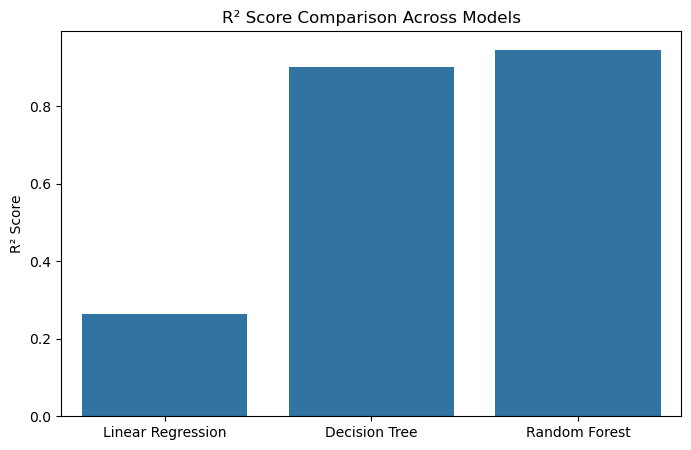

In [13]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [
    r2_score(y_test, lr_preds),
    r2_score(y_test, dt_preds),
    r2_score(y_test, rf_preds)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_scores)
plt.title("R² Score Comparison Across Models")
plt.ylabel("R² Score")
plt.show()